# Importan Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read the data 

In [2]:
df=pd.read_csv('/Users/tuhinalambijoy/Documents/Data Science Course Material/Naive bayes/Assignment_Data_fake_or_real_news.csv')
df

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df_copy = df.copy()

In [4]:
df=df.drop('id',axis=1)

In [5]:
df=df.drop('title',axis=1)

In [6]:
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Removing the duplicates

In [7]:
df.drop_duplicates()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
df=df.drop_duplicates()
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [9]:
df=df.reset_index()
df

,index,text,label
0,0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,It's primary day in New York and front-runners...,REAL
...,...,...,...
6055,6330,The State Department told the Republican Natio...,REAL
6056,6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6057,6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6058,6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [10]:
df.drop('index',axis=1,inplace=True)

In [11]:
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6055,The State Department told the Republican Natio...,REAL
6056,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6057,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6058,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Feature

In [12]:
X=df['text']
X


0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6055    The State Department told the Republican Natio...
6056    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6057     Anti-Trump Protesters Are Tools of the Oligar...
6058    ADDIS ABABA, Ethiopia —President Obama convene...
6059    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6060, dtype: object

# Target

In [13]:
y=df['label']
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6055    REAL
6056    FAKE
6057    FAKE
6058    REAL
6059    REAL
Name: label, Length: 6060, dtype: object

# Train Test Split the Feature and Target

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
X_train

3793    Home » Headlines » World News » Oathkeeper Cha...
1655    Originally appeared at The Blog Mire \nFollowi...
1232    Share on Facebook Native Americans attempting ...
4760    The state Duma has postponed the adoption of t...
610     « Previous - Next » The First Space Photo Of E...
                              ...                        
905     By Julian Assange / counterpunch.org \nIn rece...
5192    THIS IS COMEY’S LAST CHANCE FOR REDEMPTION THI...
3980    Sen. Cory Booker acknowledges that the Senate'...
235     Donald Trump tried to tamp down a newly revive...
5157    Rush Limbaugh: “I don’t remember a vice presid...
Name: text, Length: 4848, dtype: object

# Count Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

countV = CountVectorizer()

In [47]:
v = CountVectorizer()

X_train_cv = v.fit_transform(X_train)
X_train_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1709076 stored elements and shape (4848, 61510)>

In [48]:
X_train_cv.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4848, 61510))

In [49]:
X_train_cv.shape

(4848, 61510)

# Training Dataset

In [50]:
Train_df=pd.DataFrame(X_train_cv.toarray(),columns=v.get_feature_names_out())
Train_df

,00,000,0000,00000031,000035,00006,0001,0001pt,0002,000ft,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4844,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training the Model

In [51]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Train_df, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


# Training Data Accuracy

In [52]:
model.score(Train_df,y_train)

0.9372937293729373

In [53]:
X_test_cv=v.transform(X_test)

In [54]:
X_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1212, 61510))

In [55]:
Test_df=pd.DataFrame(X_test_cv.toarray(),columns=v.get_feature_names_out())

# Test Data

In [56]:
Test_df

,00,000,0000,00000031,000035,00006,0001,0001pt,0002,000ft,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Performance

In [57]:
model.score(Test_df,y_test)

0.8877887788778878

In [58]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.87      0.89       625
        REAL       0.86      0.91      0.89       587

    accuracy                           0.89      1212
   macro avg       0.89      0.89      0.89      1212
weighted avg       0.89      0.89      0.89      1212



# Confusion Metrix Display

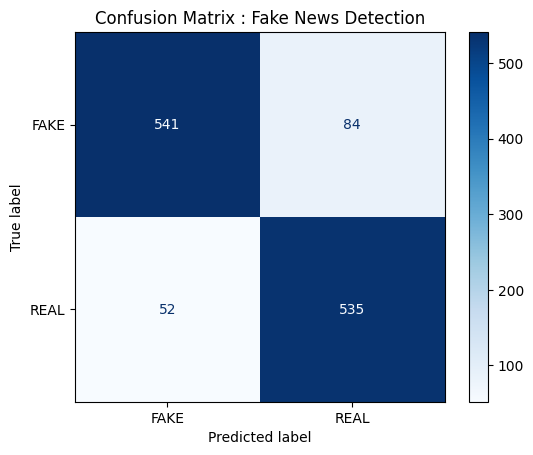

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    model,
    X_test_cv,
    y_test,
    display_labels=["FAKE", "REAL"],
    cmap="Blues"
)
plt.title('Confusion Matrix : Fake News Detection')
plt.show()